In [150]:
"""Below is a dashboard I have created in Power BI. The purpose of this dashboard is to show the location of the given AirBnB, its prediced price vs. 
listed, and the difference between the two values. When the difference between the predicted price and real price is positive, the listed price is lower than what the model predicted.""".replace("\n","")

'Below is a dashboard I have created in Power BI. The purpose of this dashboard is to show the location of the given AirBnB, its prediced price vs. listed, and the difference between the two values. When the difference between the predicted price and real price is positive, the listed price is lower than what the model predicted.'

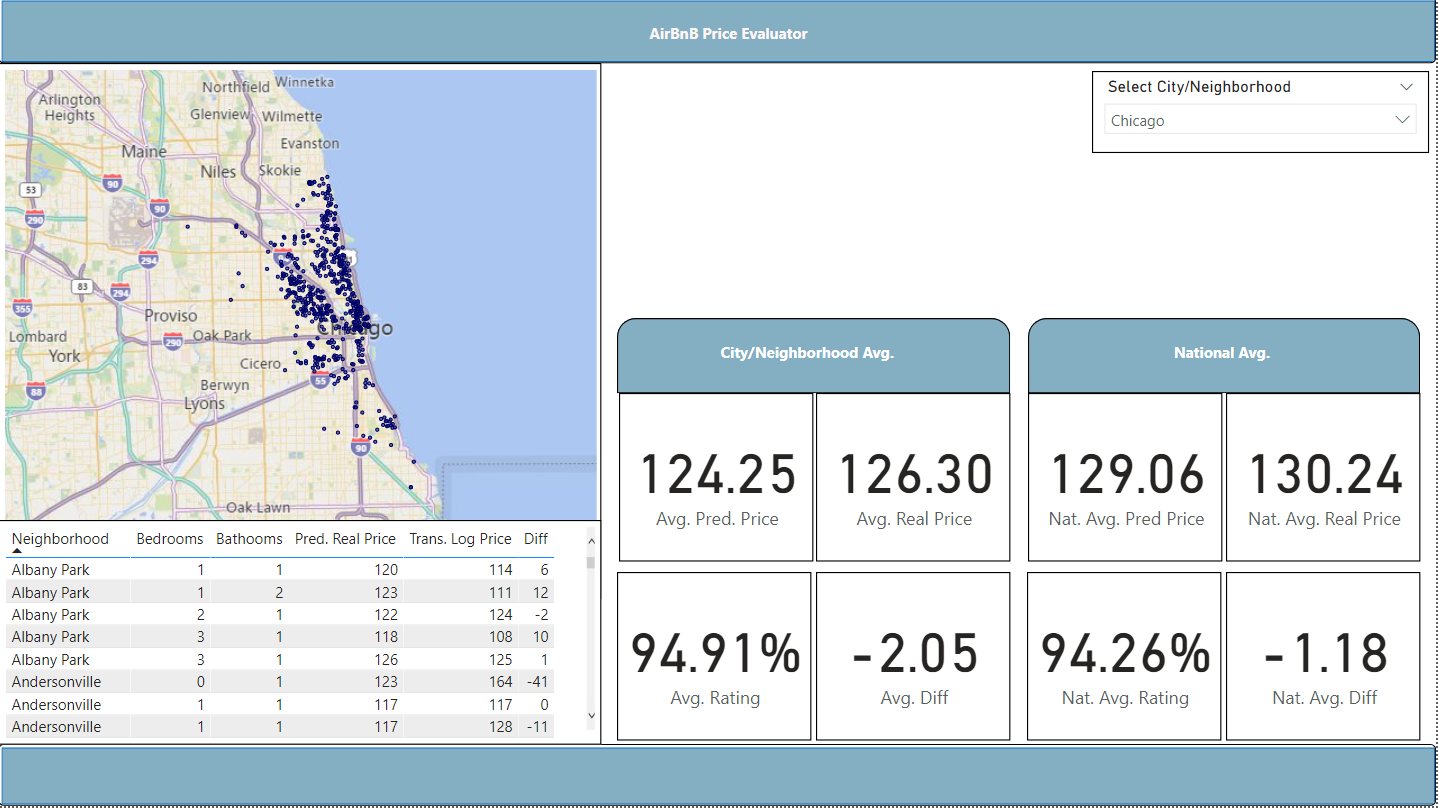

In [146]:
from IPython.display import Image
Image("AiBnBDash.PNG")

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")
style.use('ggplot')

In [144]:
# source

""""This project will dive into AirBnB apartment data for Chicago, LA, SF, DC, Boston, and NYC. The goal is to build a model for each
 city to make the most accurate predictions of price as possbile by geographic area. Since this predictor variable is a numeric data type, I will use
 linear regression to make my predictons.""" .replace("\n","")

'"This project will dive into AirBnB apartment data for Chicago, LA, SF, DC, Boston, and NYC. The goal is to build a model for each city to make the most accurate predictions of price as possbile by geographic area. Since this predictor variable is a numeric data type, I will use linear regression to make my predictons.'

# Functions Used

In [2]:
def city_airbnb_type(dataframe,city, building_type):
    
    return dataframe[(dataframe['city'] == city) & (dataframe['property_type'] == building_type)]

In [3]:
def airbnb_regression(dataframe_train, dataframe_test):
   
    
    X = dataframe_train.drop(['log_price'], axis = 1)
    y = dataframe_train.log_price
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30)
    
    location_train = X_test.copy()
    location_train = location_train[['id','latitude','longitude','city','neighbourhood']]
    
    
    X_train.drop(['beds','bed_type','latitude','longitude','room_type','neighbourhood','property_type','zipcode','city','cancellation_policy'], axis = 1, inplace=True)
    X_test.drop(['beds','bed_type','latitude','longitude','room_type','neighbourhood','property_type','zipcode','city','cancellation_policy'], axis = 1, inplace=True)
    normal_features = X_test.copy()
    
    
    scaler = MinMaxScaler()
    numeric_train = ['accommodates', 'bathrooms', 'number_of_reviews','review_scores_rating', 'bedrooms', 'host_response_rate']
    X_train[numeric_train] = scaler.fit_transform(X_train[numeric_train])

    numeric_test = ['accommodates', 'bathrooms', 'number_of_reviews','review_scores_rating', 'bedrooms','host_response_rate']
    X_test[numeric_test] = scaler.fit_transform(X_test[numeric_test])
    
    
    # train
    lr2 = LinearRegression()
    lr2.fit(X_train, y_train)
    
    y_pred = lr2.predict(X_test)
    
    MSE = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    

    location_test = dataframe_test.copy()
    location_test = location_test[['id','latitude','longitude','city','neighbourhood']]
    
    dataframe_test.drop(['beds','bed_type','latitude','longitude','room_type','neighbourhood','property_type','zipcode','city','cancellation_policy'], axis = 1, inplace=True)
    normal_test_features = dataframe_test.copy()
    
    dataframe_test[numeric_test] = scaler.fit_transform(dataframe_test[numeric_test])
    y_pred_test = lr2.predict(dataframe_test)

    
    return MSE, r2, y_test, y_pred, y_pred_test, location_train, location_test, normal_features, normal_test_features 

# Load Data

In [4]:
airbnb_train = pd.read_csv(r'C:\Users\ranih\OneDrive\Desktop\Python For Real\Github\Data\Kaggle\AirBnb\airbnb_train.csv')
airbnb_test = pd.read_csv(r'C:\Users\ranih\OneDrive\Desktop\Python For Real\Github\Data\Kaggle\AirBnb\airbnb_test.csv')

In [5]:
print("train rows:", airbnb_train.shape[0])
print("train columns:", airbnb_train.shape[1])

train rows: 74111
train columns: 29


In [6]:
print("test rows:", airbnb_test.shape[0])
print("test columns:", airbnb_test.shape[1])

test rows: 25458
test columns: 28


# Data Exploration

In [7]:
# check for null values
airbnb_train.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [8]:
# check for null values
airbnb_test.isnull().sum()

id                           0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   79
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                 14
first_review              5436
host_has_profile_pic        55
host_identity_verified      55
host_response_rate        6306
host_since                  55
instant_bookable             0
last_review               5425
latitude                     0
longitude                    0
name                         5
neighbourhood             2465
number_of_reviews            0
review_scores_rating      5717
thumbnail_url             2859
zipcode                    321
bedrooms                    28
beds                        46
dtype: int64

In [9]:
"""both the train/test dataframes have missing values that need to be either filled/dropped."""

'both the train/test dataframes have missing values that need to be either filled/dropped.'

In [10]:
airbnb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [11]:
airbnb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      25458 non-null  int64  
 1   property_type           25458 non-null  object 
 2   room_type               25458 non-null  object 
 3   amenities               25458 non-null  object 
 4   accommodates            25458 non-null  int64  
 5   bathrooms               25379 non-null  float64
 6   bed_type                25458 non-null  object 
 7   cancellation_policy     25458 non-null  object 
 8   cleaning_fee            25458 non-null  bool   
 9   city                    25458 non-null  object 
 10  description             25444 non-null  object 
 11  first_review            20022 non-null  object 
 12  host_has_profile_pic    25403 non-null  object 
 13  host_identity_verified  25403 non-null  object 
 14  host_response_rate      19152 non-null

In [12]:
"""Both dataframes contain a mix of int64, float64, and object data types.There are a few data type conversion and cleaning the must be ran.""".replace("\n"," ")

'Both dataframes contain a mix of int64, float64, and object data types.There are a few data type conversion and cleaning the must be ran.'

# Data Cleaning

### Numeric Data Imputation

### Train Data

In [13]:
# creating a dataframe of only numeric values in order to impute missing values with the mean of the given column
airbnb_train_int = airbnb_train.select_dtypes(exclude=['object'])
airbnb_train_int.drop('cleaning_fee', axis = 1, inplace=True)

In [14]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy="median")
mean_imputer.fit(airbnb_train_int)
airbnb_train_fill = mean_imputer.transform(airbnb_train_int)
airbnb_train_fill = pd.DataFrame(airbnb_train_fill, columns=['id','log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'])
airbnb_train_fill.head()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257.0,5.010635,3.0,1.0,40.696524,-73.991617,2.0,100.0,1.0,1.0
1,6304928.0,5.129899,7.0,1.0,40.766115,-73.989040,6.0,93.0,3.0,3.0
2,7919400.0,4.976734,5.0,1.0,40.808110,-73.943756,10.0,92.0,1.0,3.0
3,13418779.0,6.620073,4.0,1.0,37.772004,-122.431619,0.0,96.0,2.0,2.0
4,3808709.0,4.744932,2.0,1.0,38.925627,-77.034596,4.0,40.0,0.0,1.0


In [15]:
# check for missing values
airbnb_train_fill.isnull().sum()

id                      0
log_price               0
accommodates            0
bathrooms               0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

### Test Data

In [16]:
# creating a dataframe of only numeric values in order to impute missing values with the mean of the given column
airbnb_test_int = airbnb_test.select_dtypes(exclude=['object'])
airbnb_test_int.drop('cleaning_fee', axis = 1, inplace=True)

In [17]:
mean_imputer_2 = SimpleImputer(missing_values=np.nan, strategy="median")
mean_imputer_2.fit(airbnb_test_int)
airbnb_test_fill = mean_imputer_2.transform(airbnb_test_int)
airbnb_test_fill = pd.DataFrame(airbnb_test_fill, columns=['id','accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'])
airbnb_test_fill.head()

,id,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,3895911.0,2.0,1.0,34.028372,-118.494449,6.0,97.0,1.0,1.0
1,9710289.0,3.0,1.0,40.720380,-73.942329,2.0,80.0,1.0,1.0
2,9051635.0,1.0,1.0,37.785434,-122.470284,2.0,100.0,1.0,1.0
3,708374.0,1.0,1.0,33.976026,-118.463471,7.0,94.0,0.0,1.0
4,626296.0,2.0,1.0,40.735573,-74.005996,0.0,96.0,1.0,1.0


In [18]:
# check for missing values
airbnb_test_fill.isnull().sum()

id                      0
accommodates            0
bathrooms               0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

In [19]:
"""Numeric features for both dataframes have been filled with the median of the respective columns"""

'Numeric features for both dataframes have been filled with the median of the respective columns'

# Boolean Features

### Train

In [20]:
airbnb_train_bool = airbnb_train[['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified','instant_bookable']]
airbnb_train_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,True,t,t,f
1,True,t,f,t
2,True,t,t,t
3,True,t,t,f
4,True,t,t,t


In [21]:
airbnb_train_bool.loc[airbnb_train_bool['host_has_profile_pic'] == 't', 'host_has_profile_pic'] = 1
airbnb_train_bool.loc[airbnb_train_bool['host_has_profile_pic'] == 'f', 'host_has_profile_pic'] = 0
airbnb_train_bool.loc[airbnb_train_bool['host_identity_verified'] == 't', 'host_identity_verified'] = 1
airbnb_train_bool.loc[airbnb_train_bool['host_identity_verified'] == 'f', 'host_identity_verified'] = 0
airbnb_train_bool.loc[airbnb_train_bool['instant_bookable'] == 't', 'instant_bookable'] = 1
airbnb_train_bool.loc[airbnb_train_bool['instant_bookable'] == 'f', 'instant_bookable'] = 0

In [22]:
airbnb_train_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,True,1,1,0
1,True,1,0,1
2,True,1,1,1
3,True,1,1,0
4,True,1,1,1


In [23]:
airbnb_train_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cleaning_fee            74111 non-null  bool  
 1   host_has_profile_pic    73923 non-null  object
 2   host_identity_verified  73923 non-null  object
 3   instant_bookable        74111 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.8+ MB


In [24]:
# converting to boolean
airbnb_train_bool['host_has_profile_pic'] = airbnb_train_bool.host_has_profile_pic == 1
airbnb_train_bool['host_identity_verified'] = airbnb_train_bool.host_identity_verified == 1
airbnb_train_bool['instant_bookable'] = airbnb_train_bool.host_identity_verified == 1

In [25]:
airbnb_train_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   cleaning_fee            74111 non-null  bool 
 1   host_has_profile_pic    74111 non-null  bool 
 2   host_identity_verified  74111 non-null  bool 
 3   instant_bookable        74111 non-null  bool 
dtypes: bool(4)
memory usage: 289.6 KB


In [26]:
airbnb_train_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,True,True,True,True
1,True,True,False,False
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True


In [27]:
airbnb_train_bool['cleaning_fee'] = airbnb_train_bool['cleaning_fee'].astype(int)
airbnb_train_bool['host_has_profile_pic'] = airbnb_train_bool['host_has_profile_pic'].astype(int)
airbnb_train_bool['host_identity_verified'] = airbnb_train_bool['host_identity_verified'].astype(int)
airbnb_train_bool['instant_bookable'] = airbnb_train_bool['instant_bookable'].astype(int)

In [28]:
airbnb_train_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,1,1,1,1
1,1,1,0,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


### Test

In [29]:
airbnb_test_bool = airbnb_test[['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified','instant_bookable']]
airbnb_test_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,True,t,f,f
1,True,t,t,f
2,True,t,t,f
3,True,t,t,f
4,True,t,t,f


In [30]:
airbnb_test_bool.loc[airbnb_test_bool['host_has_profile_pic'] == 't', 'host_has_profile_pic'] = 1
airbnb_test_bool.loc[airbnb_test_bool['host_has_profile_pic'] == 'f', 'host_has_profile_pic'] = 0
airbnb_test_bool.loc[airbnb_test_bool['host_identity_verified'] == 't', 'host_identity_verified'] = 1
airbnb_test_bool.loc[airbnb_test_bool['host_identity_verified'] == 'f', 'host_identity_verified'] = 0
airbnb_test_bool.loc[airbnb_test_bool['instant_bookable'] == 't', 'instant_bookable'] = 1
airbnb_test_bool.loc[airbnb_test_bool['instant_bookable'] == 'f', 'instant_bookable'] = 0

In [31]:
airbnb_test_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,True,1,0,0
1,True,1,1,0
2,True,1,1,0
3,True,1,1,0
4,True,1,1,0


In [32]:
airbnb_test_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cleaning_fee            25458 non-null  bool  
 1   host_has_profile_pic    25403 non-null  object
 2   host_identity_verified  25403 non-null  object
 3   instant_bookable        25458 non-null  object
dtypes: bool(1), object(3)
memory usage: 621.7+ KB


In [33]:
# converting to boolean
airbnb_test_bool['host_has_profile_pic'] = airbnb_test_bool.host_has_profile_pic == 1
airbnb_test_bool['host_identity_verified'] = airbnb_test_bool.host_identity_verified == 1
airbnb_test_bool['instant_bookable'] = airbnb_test_bool.host_identity_verified == 1

In [34]:
airbnb_test_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   cleaning_fee            25458 non-null  bool 
 1   host_has_profile_pic    25458 non-null  bool 
 2   host_identity_verified  25458 non-null  bool 
 3   instant_bookable        25458 non-null  bool 
dtypes: bool(4)
memory usage: 99.6 KB


In [35]:
airbnb_test_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,True,True,False,False
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True


In [36]:
airbnb_test_bool['cleaning_fee'] = airbnb_test_bool['cleaning_fee'].astype(int)
airbnb_test_bool['host_has_profile_pic'] = airbnb_test_bool['host_has_profile_pic'].astype(int)
airbnb_test_bool['host_identity_verified'] = airbnb_test_bool['host_identity_verified'].astype(int)
airbnb_test_bool['instant_bookable'] = airbnb_test_bool['instant_bookable'].astype(int)

In [37]:
airbnb_test_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,1,1,0,0
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


# Object Feature cleaning

### Test

In [38]:
airbnb_train_obj = airbnb_train.select_dtypes(include='object')
airbnb_train_obj.head(3)

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",6/18/2016,t,t,NaN,3/26/2012,f,7/18/2016,Beautiful brownstone 1-bedroom,Brooklyn Heights,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,t,f,100%,6/19/2017,t,9/23/2017,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,https://a0.muscache.com/im/pictures/348a55fe-4...,10019
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,t,t,100%,10/25/2016,t,9/14/2017,The Garden Oasis,Harlem,https://a0.muscache.com/im/pictures/6fae5362-9...,10027


In [39]:
# dropping columns from boolean df
airbnb_train_obj.drop(['host_has_profile_pic','host_identity_verified','instant_bookable'], axis = 1, inplace=True)

In [40]:
airbnb_train_obj.head(3)

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_response_rate,host_since,last_review,name,neighbourhood,thumbnail_url,zipcode
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",6/18/2016,NaN,3/26/2012,7/18/2016,Beautiful brownstone 1-bedroom,Brooklyn Heights,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,100%,6/19/2017,9/23/2017,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,https://a0.muscache.com/im/pictures/348a55fe-4...,10019
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,100%,10/25/2016,9/14/2017,The Garden Oasis,Harlem,https://a0.muscache.com/im/pictures/6fae5362-9...,10027


In [41]:
# checking for missing values
airbnb_train_obj.isnull().sum()

property_type              0
room_type                  0
amenities                  0
bed_type                   0
cancellation_policy        0
city                       0
description                0
first_review           15864
host_response_rate     18299
host_since               188
last_review            15827
name                       0
neighbourhood           6872
thumbnail_url           8216
zipcode                  966
dtype: int64

In [42]:
# dropping a few columns that are not viable at this time
airbnb_train_obj.drop(['first_review','host_since', 'last_review','thumbnail_url','description','name','amenities'], axis = 1, inplace=True)

In [43]:
# dropping missing neighbourhood values, though this could be filled in by long/late and or zipcode features
airbnb_train_obj = airbnb_train_obj.dropna(subset=['neighbourhood'])
airbnb_train_obj = airbnb_train_obj.dropna(subset=['zipcode'])

In [44]:
# cleaning up the response rate column as this will be a proxy for customer service
airbnb_train_obj['host_response_rate'] = airbnb_train_obj['host_response_rate'].str.replace("%", '')
airbnb_train_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66660 entries, 0 to 74110
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_type        66660 non-null  object
 1   room_type            66660 non-null  object
 2   bed_type             66660 non-null  object
 3   cancellation_policy  66660 non-null  object
 4   city                 66660 non-null  object
 5   host_response_rate   49527 non-null  object
 6   neighbourhood        66660 non-null  object
 7   zipcode              66660 non-null  object
dtypes: object(8)
memory usage: 4.6+ MB


In [45]:
# convert host_response_rate to an int then divide by 100 while filling NA with 0
airbnb_train_obj['host_response_rate'] = airbnb_train_obj['host_response_rate'].astype(str).astype(float) 
airbnb_train_obj['host_response_rate'] = airbnb_train_obj['host_response_rate'] /100
airbnb_train_obj['host_response_rate'] = airbnb_train_obj['host_response_rate'].fillna('0')
airbnb_train_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66660 entries, 0 to 74110
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_type        66660 non-null  object
 1   room_type            66660 non-null  object
 2   bed_type             66660 non-null  object
 3   cancellation_policy  66660 non-null  object
 4   city                 66660 non-null  object
 5   host_response_rate   66660 non-null  object
 6   neighbourhood        66660 non-null  object
 7   zipcode              66660 non-null  object
dtypes: object(8)
memory usage: 4.6+ MB


In [46]:
airbnb_train_obj.head(3)

,property_type,room_type,bed_type,cancellation_policy,city,host_response_rate,neighbourhood,zipcode
0,Apartment,Entire home/apt,Real Bed,strict,NYC,0,Brooklyn Heights,11201
1,Apartment,Entire home/apt,Real Bed,strict,NYC,1.0,Hell's Kitchen,10019
2,Apartment,Entire home/apt,Real Bed,moderate,NYC,1.0,Harlem,10027


In [47]:
airbnb_train_obj.isnull().sum()

property_type          0
room_type              0
bed_type               0
cancellation_policy    0
city                   0
host_response_rate     0
neighbourhood          0
zipcode                0
dtype: int64

### Test

In [48]:
airbnb_test_obj = airbnb_test.select_dtypes(include='object')
airbnb_test_obj.head(3)

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
0,Apartment,Private room,"{TV,""Cable TV"",Kitchen,""Free parking on premis...",Real Bed,flexible,LA,"Close to SM beaches, 3rd Street Promenade, SM ...",2016-10-23,t,f,100%,2016-08-13,f,2017-02-26,Santa Monica Private Bedroom/Bathroom Suite,Santa Monica,https://a0.muscache.com/im/pictures/92355eae-b...,90403
1,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,This apartment will give you a true (luxury) B...,2016-09-12,t,t,100%,2013-12-04,f,2016-10-16,"Bright, charming luxury 1 BR with amazing rooftop",Williamsburg,https://a0.muscache.com/im/pictures/da03e413-d...,11222
2,Apartment,Private room,"{""Wireless Internet"",Kitchen,Heating,""Family/k...",Real Bed,moderate,SF,Spacious 1 bedroom apartment apartment with se...,2016-11-13,t,t,100%,2011-08-02,f,2016-11-17,Private room in charming apartment,Richmond District,https://a0.muscache.com/im/pictures/0ba7d8aa-9...,94118


In [49]:
# dropping columns from boolean df
airbnb_test_obj.drop(['host_has_profile_pic','host_identity_verified','instant_bookable','description','name','amenities'], axis = 1, inplace=True)

In [50]:
airbnb_test_obj.head(3)

,property_type,room_type,bed_type,cancellation_policy,city,first_review,host_response_rate,host_since,last_review,neighbourhood,thumbnail_url,zipcode
0,Apartment,Private room,Real Bed,flexible,LA,2016-10-23,100%,2016-08-13,2017-02-26,Santa Monica,https://a0.muscache.com/im/pictures/92355eae-b...,90403
1,Apartment,Entire home/apt,Real Bed,moderate,NYC,2016-09-12,100%,2013-12-04,2016-10-16,Williamsburg,https://a0.muscache.com/im/pictures/da03e413-d...,11222
2,Apartment,Private room,Real Bed,moderate,SF,2016-11-13,100%,2011-08-02,2016-11-17,Richmond District,https://a0.muscache.com/im/pictures/0ba7d8aa-9...,94118


In [51]:
# checking for missing values
airbnb_test_obj.isnull().sum()

property_type             0
room_type                 0
bed_type                  0
cancellation_policy       0
city                      0
first_review           5436
host_response_rate     6306
host_since               55
last_review            5425
neighbourhood          2465
thumbnail_url          2859
zipcode                 321
dtype: int64

In [52]:
# dropping a few columns that are not viable at this time
airbnb_test_obj.drop(['first_review','host_since', 'last_review','thumbnail_url'], axis = 1, inplace=True)

In [53]:
# dropping missing neighbourhood values, though this could be filled in by long/late and or zipcode features
airbnb_test_obj = airbnb_test_obj.dropna(subset=['neighbourhood'])
airbnb_test_obj = airbnb_test_obj.dropna(subset=['zipcode'])

In [54]:
# cleaning up the response rate column as this will be a proxy for customer service
airbnb_test_obj['host_response_rate'] = airbnb_test_obj['host_response_rate'].str.replace("%", '')
airbnb_test_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22797 entries, 0 to 25457
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_type        22797 non-null  object
 1   room_type            22797 non-null  object
 2   bed_type             22797 non-null  object
 3   cancellation_policy  22797 non-null  object
 4   city                 22797 non-null  object
 5   host_response_rate   16911 non-null  object
 6   neighbourhood        22797 non-null  object
 7   zipcode              22797 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [55]:
# convert host_response_rate to an int then divide by 100 while filling NA with 0
airbnb_test_obj['host_response_rate'] = airbnb_test_obj['host_response_rate'].astype(str).astype(float) 
airbnb_test_obj['host_response_rate'] = airbnb_test_obj['host_response_rate'] /100
airbnb_test_obj['host_response_rate'] = airbnb_test_obj['host_response_rate'].fillna('0')
airbnb_test_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22797 entries, 0 to 25457
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_type        22797 non-null  object
 1   room_type            22797 non-null  object
 2   bed_type             22797 non-null  object
 3   cancellation_policy  22797 non-null  object
 4   city                 22797 non-null  object
 5   host_response_rate   22797 non-null  object
 6   neighbourhood        22797 non-null  object
 7   zipcode              22797 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [56]:
airbnb_test_obj.head(3)

,property_type,room_type,bed_type,cancellation_policy,city,host_response_rate,neighbourhood,zipcode
0,Apartment,Private room,Real Bed,flexible,LA,1.0,Santa Monica,90403
1,Apartment,Entire home/apt,Real Bed,moderate,NYC,1.0,Williamsburg,11222
2,Apartment,Private room,Real Bed,moderate,SF,1.0,Richmond District,94118


In [57]:
airbnb_test_obj.isnull().sum()

property_type          0
room_type              0
bed_type               0
cancellation_policy    0
city                   0
host_response_rate     0
neighbourhood          0
zipcode                0
dtype: int64

# Concatinating Dataframes

### Train

In [58]:
airbnb_train_final = pd.concat([airbnb_train_fill, airbnb_train_obj ,airbnb_train_bool],axis=1)
airbnb_train_final.head()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,...,bed_type,cancellation_policy,city,host_response_rate,neighbourhood,zipcode,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,6901257.0,5.010635,3.0,1.0,40.696524,-73.991617,2.0,100.0,1.0,1.0,...,Real Bed,strict,NYC,0,Brooklyn Heights,11201,1,1,1,1
1,6304928.0,5.129899,7.0,1.0,40.766115,-73.989040,6.0,93.0,3.0,3.0,...,Real Bed,strict,NYC,1.0,Hell's Kitchen,10019,1,1,0,0
2,7919400.0,4.976734,5.0,1.0,40.808110,-73.943756,10.0,92.0,1.0,3.0,...,Real Bed,moderate,NYC,1.0,Harlem,10027,1,1,1,1
3,13418779.0,6.620073,4.0,1.0,37.772004,-122.431619,0.0,96.0,2.0,2.0,...,Real Bed,flexible,SF,0,Lower Haight,94117,1,1,1,1
4,3808709.0,4.744932,2.0,1.0,38.925627,-77.034596,4.0,40.0,0.0,1.0,...,Real Bed,moderate,DC,1.0,Columbia Heights,20009,1,1,1,1


In [59]:
airbnb_train_final.isnull().sum()

id                           0
log_price                    0
accommodates                 0
bathrooms                    0
latitude                     0
longitude                    0
number_of_reviews            0
review_scores_rating         0
bedrooms                     0
beds                         0
property_type             7451
room_type                 7451
bed_type                  7451
cancellation_policy       7451
city                      7451
host_response_rate        7451
neighbourhood             7451
zipcode                   7451
cleaning_fee                 0
host_has_profile_pic         0
host_identity_verified       0
instant_bookable             0
dtype: int64

In [60]:
cols =  list(airbnb_train_final.columns)

In [61]:
airbnb_train_final.dropna(subset=cols, inplace=True)

In [62]:
airbnb_train_final.isnull().sum()

id                        0
log_price                 0
accommodates              0
bathrooms                 0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
property_type             0
room_type                 0
bed_type                  0
cancellation_policy       0
city                      0
host_response_rate        0
neighbourhood             0
zipcode                   0
cleaning_fee              0
host_has_profile_pic      0
host_identity_verified    0
instant_bookable          0
dtype: int64

In [63]:
airbnb_train_final['review_scores_rating'] = airbnb_train_final['review_scores_rating']/100
airbnb_train_final["host_response_rate"] = airbnb_train_final["host_response_rate"].astype(str).astype(float)

### Test 

In [64]:
airbnb_test_final = pd.concat([airbnb_test_fill, airbnb_test_obj ,airbnb_test_bool], axis=1)
airbnb_test_final.head()

,id,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,...,bed_type,cancellation_policy,city,host_response_rate,neighbourhood,zipcode,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,3895911.0,2.0,1.0,34.028372,-118.494449,6.0,97.0,1.0,1.0,Apartment,...,Real Bed,flexible,LA,1.0,Santa Monica,90403,1,1,0,0
1,9710289.0,3.0,1.0,40.720380,-73.942329,2.0,80.0,1.0,1.0,Apartment,...,Real Bed,moderate,NYC,1.0,Williamsburg,11222,1,1,1,1
2,9051635.0,1.0,1.0,37.785434,-122.470284,2.0,100.0,1.0,1.0,Apartment,...,Real Bed,moderate,SF,1.0,Richmond District,94118,1,1,1,1
3,708374.0,1.0,1.0,33.976026,-118.463471,7.0,94.0,0.0,1.0,Apartment,...,Real Bed,strict,LA,1.0,Marina Del Rey,90292,1,1,1,1
4,626296.0,2.0,1.0,40.735573,-74.005996,0.0,96.0,1.0,1.0,Apartment,...,Real Bed,flexible,NYC,0,West Village,10014,1,1,1,1


In [65]:
airbnb_test_final.isnull().sum()

id                           0
accommodates                 0
bathrooms                    0
latitude                     0
longitude                    0
number_of_reviews            0
review_scores_rating         0
bedrooms                     0
beds                         0
property_type             2661
room_type                 2661
bed_type                  2661
cancellation_policy       2661
city                      2661
host_response_rate        2661
neighbourhood             2661
zipcode                   2661
cleaning_fee                 0
host_has_profile_pic         0
host_identity_verified       0
instant_bookable             0
dtype: int64

In [66]:
cols =  list(airbnb_test_final.columns)

In [67]:
airbnb_test_final.dropna(subset=cols, inplace=True)

In [68]:
airbnb_test_final.isnull().sum()

id                        0
accommodates              0
bathrooms                 0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
property_type             0
room_type                 0
bed_type                  0
cancellation_policy       0
city                      0
host_response_rate        0
neighbourhood             0
zipcode                   0
cleaning_fee              0
host_has_profile_pic      0
host_identity_verified    0
instant_bookable          0
dtype: int64

In [69]:
airbnb_test_final['review_scores_rating'] = airbnb_test_final['review_scores_rating']/100
airbnb_test_final["host_response_rate"] = airbnb_test_final["host_response_rate"].astype(str).astype(float)
airbnb_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22797 entries, 0 to 25457
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22797 non-null  float64
 1   accommodates            22797 non-null  float64
 2   bathrooms               22797 non-null  float64
 3   latitude                22797 non-null  float64
 4   longitude               22797 non-null  float64
 5   number_of_reviews       22797 non-null  float64
 6   review_scores_rating    22797 non-null  float64
 7   bedrooms                22797 non-null  float64
 8   beds                    22797 non-null  float64
 9   property_type           22797 non-null  object 
 10  room_type               22797 non-null  object 
 11  bed_type                22797 non-null  object 
 12  cancellation_policy     22797 non-null  object 
 13  city                    22797 non-null  object 
 14  host_response_rate      22797 non-null

# Predicting Prices of AirBnB Apartments

In [70]:
# Training Data
CHI_airbnb_train = city_airbnb_type(airbnb_train_final, 'Chicago', 'Apartment')
LA_airbnb_train = city_airbnb_type(airbnb_train_final, 'LA', 'Apartment')
SF_airbnb_train = city_airbnb_type(airbnb_train_final, 'SF', 'Apartment')
DC_airbnb_train = city_airbnb_type(airbnb_train_final, 'DC', 'Apartment')
BOS_airbnb_train = city_airbnb_type(airbnb_train_final, 'Boston', 'Apartment')
NYC_airbnb_train = city_airbnb_type(airbnb_train_final, 'NYC', 'Apartment')


# Testing Data
CHI_airbnb_test = city_airbnb_type(airbnb_test_final, 'Chicago', 'Apartment')
LA_airbnb_test = city_airbnb_type(airbnb_test_final, 'LA', 'Apartment')
SF_airbnb_test = city_airbnb_type(airbnb_test_final, 'SF', 'Apartment')
DC_airbnb_test = city_airbnb_type(airbnb_test_final, 'DC', 'Apartment')
BOS_airbnb_test = city_airbnb_type(airbnb_test_final, 'Boston', 'Apartment')
NYC_airbnb_test = city_airbnb_type(airbnb_test_final, 'NYC', 'Apartment')

# Data Normalization

In [71]:
# Dropping unused featuers
CHI_airbnb_train_scores = CHI_airbnb_train.drop(['beds','bed_type','latitude','longitude','room_type','neighbourhood','property_type','zipcode','city','cancellation_policy'], axis = 1)
LA_airbnb_train_scores = LA_airbnb_train.drop(['beds','bed_type','latitude','longitude','room_type','neighbourhood','property_type','zipcode','city','cancellation_policy'], axis = 1)
SF_airbnb_train_scores = SF_airbnb_train.drop(['beds','bed_type','latitude','longitude','room_type','neighbourhood','property_type','zipcode','city','cancellation_policy'], axis = 1)
DC_airbnb_train_scores = DC_airbnb_train.drop(['beds','bed_type','latitude','longitude','room_type','neighbourhood','property_type','zipcode','city','cancellation_policy'], axis = 1)
BOS_airbnb_train_scores = BOS_airbnb_train.drop(['beds','bed_type','latitude','longitude','room_type','neighbourhood','property_type','zipcode','city','cancellation_policy'], axis = 1)
NYC_airbnb_train_scores = NYC_airbnb_train.drop(['beds','bed_type','latitude','longitude','room_type','neighbourhood','property_type','zipcode','city','cancellation_policy'], axis = 1)

In [72]:
X_CHI = CHI_airbnb_train_scores.drop(['id','log_price'], axis = 1)
y_CHI = CHI_airbnb_train_scores.log_price

X_LA = LA_airbnb_train_scores.drop(['id','log_price'], axis = 1)
y_LA = LA_airbnb_train_scores.log_price

X_SF = SF_airbnb_train_scores.drop(['id','log_price'], axis = 1)
y_SF = SF_airbnb_train_scores.log_price


X_DC = DC_airbnb_train_scores.drop(['id','log_price'], axis = 1)
y_DC = DC_airbnb_train_scores.log_price

X_BOS = BOS_airbnb_train_scores.drop(['id','log_price'], axis = 1)
y_BOS = BOS_airbnb_train_scores.log_price


X_NYC = NYC_airbnb_train_scores.drop(['id','log_price'], axis = 1)
y_NYC = NYC_airbnb_train_scores.log_price

In [102]:
lr1 = LinearRegression()
CV = 10


scores_CHI = abs(cross_val_score(lr1, X_CHI, y_CHI, scoring='neg_mean_squared_error', cv = CV, n_jobs= -1))
scores_LA = abs(cross_val_score(lr1, X_LA, y_LA, scoring='neg_mean_squared_error', cv = CV, n_jobs= -1))
scores_SF = abs(cross_val_score(lr1, X_SF, y_SF, scoring='neg_mean_squared_error', cv = CV, n_jobs= -1))
scores_DC = abs(cross_val_score(lr1, X_DC, y_DC, scoring='neg_mean_squared_error', cv = CV, n_jobs= -1))
scores_BOS = abs(cross_val_score(lr1, X_BOS, y_BOS, scoring='neg_mean_squared_error', cv = CV, n_jobs= -1))
scores_NYC = abs(cross_val_score(lr1, X_NYC, y_NYC, scoring='neg_mean_squared_error', cv = CV, n_jobs= -1))

In [103]:
print("Minimum MSE for Chicago:", round(scores_CHI.min(),5))
print("Maximum MSE for Chicago:", round(scores_CHI.max(),5))
print("Mean MSE for Chicago:", round(scores_CHI.mean(),5))
print("")
print("Minimum MSE for LA:", round(scores_LA.min(),5))
print("Maximum MSE for LA:", round(scores_LA.max(),5))
print("Mean MSE for LA:", round(scores_LA.mean(),5))
print("")
print("Minimum MSE for SF:", round(scores_SF.min(),5))
print("Maximum MSE for SF:", round(scores_SF.max(),5))
print("Mean MSE for SF:", round(scores_SF.mean(),5))
print("")
print("Minimum MSE for DC:", round(scores_DC.min(),5))
print("Maximum MSE for DC:", round(scores_DC.max(),5))
print("Mean MSE for DC:", round(scores_DC.mean(),5))
print("")
print("Minimum MSE for BOS:", round(scores_BOS.min(),5))
print("Maximum MSE for BOS:", round(scores_BOS.max(),5))
print("Mean MSE for BOS:", round(scores_BOS.mean(),5))
print("")
print("Minimum MSE for NYC:", round(scores_NYC.min(),5))
print("Maximum MSE for NYC:", round(scores_NYC.max(),5))
print("Mean MSE for NYC:", round(scores_NYC.mean(),5))

Minimum MSE for Chicago: 0.20481
Maximum MSE for Chicago: 0.32851
Mean MSE for Chicago: 0.2731

Minimum MSE for LA: 0.18477
Maximum MSE for LA: 0.21984
Mean MSE for LA: 0.20075

Minimum MSE for SF: 0.21894
Maximum MSE for SF: 0.29452
Mean MSE for SF: 0.25216

Minimum MSE for DC: 0.31589
Maximum MSE for DC: 0.47818
Mean MSE for DC: 0.39343

Minimum MSE for BOS: 0.25809
Maximum MSE for BOS: 0.32576
Mean MSE for BOS: 0.2911

Minimum MSE for NYC: 0.25827
Maximum MSE for NYC: 0.28582
Mean MSE for NYC: 0.27552


In [86]:
# Training Data
CHI_airbnb_train = city_airbnb_type(airbnb_train_final, 'Chicago', 'Apartment')
LA_airbnb_train = city_airbnb_type(airbnb_train_final, 'LA', 'Apartment')
SF_airbnb_train = city_airbnb_type(airbnb_train_final, 'SF', 'Apartment')
DC_airbnb_train = city_airbnb_type(airbnb_train_final, 'DC', 'Apartment')
BOS_airbnb_train = city_airbnb_type(airbnb_train_final, 'Boston', 'Apartment')
NYC_airbnb_train = city_airbnb_type(airbnb_train_final, 'NYC', 'Apartment')


# Testing Data
CHI_airbnb_test = city_airbnb_type(airbnb_test_final, 'Chicago', 'Apartment')
LA_airbnb_test = city_airbnb_type(airbnb_test_final, 'LA', 'Apartment')
SF_airbnb_test = city_airbnb_type(airbnb_test_final, 'SF', 'Apartment')
DC_airbnb_test = city_airbnb_type(airbnb_test_final, 'DC', 'Apartment')
BOS_airbnb_test = city_airbnb_type(airbnb_test_final, 'Boston', 'Apartment')
NYC_airbnb_test = city_airbnb_type(airbnb_test_final, 'NYC', 'Apartment')

In [87]:
MSE_CHI, r2_CHI, y_test_CHI, y_pred_CHI, y_pred_test_CHI, location_train_CHI, location_test_CHI, normal_features_CHI, normal_test_features_CHI  = airbnb_regression(CHI_airbnb_train, CHI_airbnb_test)
MSE_LA, r2_LA, y_test_LA, y_pred_LA, y_pred_test_LA, location_train_LA, location_test_LA, normal_features_LA, normal_test_features_LA  = airbnb_regression(LA_airbnb_train, LA_airbnb_test)
MSE_SF, r2_SF, y_test_SF, y_pred_SF, y_pred_test_SF, location_train_SF, location_test_SF, normal_features_SF, normal_test_features_SF  = airbnb_regression(SF_airbnb_train, SF_airbnb_test)
MSE_DC, r2_DC, y_test_DC, y_pred_DC, y_pred_test_DC, location_train_DC, location_test_DC, normal_features_DC, normal_test_features_DC  = airbnb_regression(DC_airbnb_train, DC_airbnb_test)
MSE_BOS, r2_BOS, y_test_BOS, y_pred_BOS, y_pred_test_BOS, location_train_BOS, location_test_BOS, normal_features_BOS, normal_test_features_BOS  = airbnb_regression(BOS_airbnb_train, BOS_airbnb_test)
MSE_NYC, r2_NYC, y_test_NYC, y_pred_NYC, y_pred_test_NYC, location_train_NYC, location_test_NYC, normal_features_NYC, normal_test_features_NYC  = airbnb_regression(NYC_airbnb_train, NYC_airbnb_test)

In [96]:
CHI_train_pred_df = normal_features_CHI.copy()
CHI_train_pred_df['real_log_price'] = y_test_CHI
CHI_train_pred_df['pred_log_price'] = y_pred_CHI
CHI_train_pred_df = CHI_train_pred_df.merge(location_train_CHI, left_on='id', right_on='id')

In [97]:
LA_train_pred_df = normal_features_LA.copy()
LA_train_pred_df['real_log_price'] = y_test_LA
LA_train_pred_df['pred_log_price'] = y_pred_LA
LA_train_pred_df = LA_train_pred_df.merge(location_train_LA, left_on='id', right_on='id')

In [98]:
SF_train_pred_df = normal_features_SF.copy()
SF_train_pred_df['real_log_price'] = y_test_SF
SF_train_pred_df['pred_log_price'] = y_pred_SF
SF_train_pred_df = SF_train_pred_df.merge(location_train_SF, left_on='id', right_on='id')

In [99]:
DC_train_pred_df = normal_features_DC.copy()
DC_train_pred_df['real_log_price'] = y_test_DC
DC_train_pred_df['pred_log_price'] = y_pred_DC
DC_train_pred_df = DC_train_pred_df.merge(location_train_DC, left_on='id', right_on='id')

In [100]:
BOS_train_pred_df = normal_features_BOS.copy()
BOS_train_pred_df['real_log_price'] = y_test_BOS
BOS_train_pred_df['pred_log_price'] = y_pred_BOS
BOS_train_pred_df = BOS_train_pred_df.merge(location_train_BOS, left_on='id', right_on='id')

In [101]:
NYC_train_pred_df = normal_features_NYC.copy()
NYC_train_pred_df['real_log_price'] = y_test_NYC
NYC_train_pred_df['pred_log_price'] = y_pred_NYC
NYC_train_pred_df = NYC_train_pred_df.merge(location_train_NYC, left_on='id', right_on='id')

In [120]:
scores_df = pd.DataFrame([[MSE_BOS,MSE_CHI,MSE_DC,MSE_LA,MSE_NYC,MSE_SF]], index=['Location'],columns=['Boston','Chicago',                                                                                  'DC','LA','NYC','SF'])
scores_df = scores_df.T.copy()
scores_df.reset_index(inplace=True)
scores_df.rename(columns={"index": "Location", "Location": "MSE"}, errors="raise", inplace=True)

scoresr_df = pd.DataFrame([[r2_BOS,r2_CHI,r2_DC,r2_LA,r2_NYC,r2_SF]], index=['Location'],columns=['Boston','Chicago',                                                                               'DC','LA','NYC','SF'])
scoresr_df = scoresr_df.T.copy()
scoresr_df.reset_index(inplace=True)
scoresr_df.rename(columns={"index": "Location", "Location": "R2"}, errors="raise", inplace=True)

scores_df_merged = scores_df.merge(scoresr_df, left_on='Location',right_on='Location' )
scores_df_merged

,Location,MSE,R2
0,Boston,0.333781,0.228437
1,Chicago,0.300996,0.326924
2,DC,0.372702,0.260852
3,LA,0.191728,0.358528
4,NYC,0.275918,0.310660
5,SF,0.328873,0.221190


In [134]:
"""To interpret the MSE results they will have to tranformed in a way that is interpertable to the user. Doing some research
on AirBnB website I saw that prices ranged over $100 dollars per evening. This along with trying out diffrent log transformations 
lead me to conclude that the orginal data is based of minus 100 and the log2 transformation of the orginal price. Thus, 
I take the log2 transformation of MSE. I will then do the same with our final predictions as well by taking log2 trasnformation of a given prediction""".replace("\n","")

'To interpret the MSE results they will have to tranformed in a way that is interpertable to the user. Doing some researchon AirBnB website I saw that prices ranged over $100 dollars per evening. This along with trying out diffrent log transformations lead me to conclude that the orginal data is based of minus 100 and the log2 transformation of the orginal price. Thus, I take the log2 transformation of MSE. I will then do the same with our final predictions as well by taking log2 trasnformation of a given prediction'

In [132]:
"""Based on these results, the model that was created was off by 100 dollars. Given this data was likely masked before being published
by AirBnB, and by refering to their website, I will add 100 to each of my predictions so as it more accurately reflects the prices
found on the AirBnB website""".replace("\n","")

'Based on these results, the model that was created was off by 100 dollars. Given this data was likely masked before being publishedby AirBnB, and by refering to their website, I will add 100 to each of my predictions so as it more accurately reflects the pricesfound on the AirBnB website'

In [137]:
scores_df_merged['MSE_trans'] = round(2 ** scores_df_merged['MSE'] + 100, 2)
scores_df_merged = scores_df_merged.sort_values(by=['MSE'])
scores_df_merged

,Location,MSE,R2,MSE_trans
3,LA,0.191728,0.358528,101.14
4,NYC,0.275918,0.310660,101.21
1,Chicago,0.300996,0.326924,101.23
5,SF,0.328873,0.221190,101.26
0,Boston,0.333781,0.228437,101.26
2,DC,0.372702,0.260852,101.29


In [138]:
"""Our final result shows that the LA model is the best a predicting the price of a given AirBnB Apartment with an MSE of .19 (101.14) tells us 
predictions made by this model were the most accurate of the other cities. Additonally, we know that r2 = .35, meaning this model explains 35% of the variability
found in our predictor variable log_price.""".replace("\n","")

'Our final result shows that the LA model is the best a predicting the price of a given AirBnB Apartment with an MSE of .19 (101.14) tells us predictions made by this model were the most accurate of the other cities. Additonally, we know that r2 = .35, meaning this model explains 35% of the variabilityfound in our predictor variable log_price.'

In [121]:
dfs = [CHI_train_pred_df, LA_train_pred_df, SF_train_pred_df, DC_train_pred_df, BOS_train_pred_df, NYC_train_pred_df]
final_df = pd.concat(dfs)
final_df['trans_log_price'] = round(2 ** final_df['real_log_price'] + 100) 
final_df['pred_real_price'] = round(2 ** final_df['pred_log_price'] + 100)
final_df['diff'] = final_df['pred_real_price'] - final_df['trans_log_price']
AirBnB_Predictions = final_df.copy()
# Final Dataframe with predictions from each city.
AirBnB_Predictions.head(3)

,id,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,host_response_rate,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,real_log_price,pred_log_price,latitude,longitude,city,neighbourhood,trans_log_price,pred_real_price,diff
0,19856802.0,6.0,1.0,11.0,0.84,2.0,1.0,1,1,1,1,4.094345,4.735397,41.858719,-87.650430,Chicago,Pilsen,117.0,127.0,10.0
1,3206029.0,2.0,1.0,21.0,0.96,1.0,1.0,1,1,1,1,4.174387,4.235091,41.911928,-87.676809,Chicago,Wicker Park,118.0,119.0,1.0
2,9996642.0,1.0,1.0,154.0,0.95,1.0,1.0,1,1,1,1,3.806662,3.850856,41.891642,-87.673836,Chicago,West Town/Noble Square,114.0,114.0,0.0


In [115]:
AirBnB_Predictions_CSV = AirBnB_Predictions.to_csv(index=False)

In [116]:
# Outputed to be fed into Power BI for further visualizaton 
compression_opts = dict(method='zip',archive_name='AirBnB_Predictions_CSV.csv')  
AirBnB_Predictions.to_csv('AirBnBPred.zip', index=False, compression = compression_opts)